 Multiple Linear Regression

 Bike Sharing Case Study
 
 Problem Statement
        A US bike-sharing provider BoomBikes has recently suffered considerable dips in
    their revenues due to the ongoing Corona 
    pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come
    up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end,
    and the economy restores to a healthy state. 

 The company wants to know:

      - Which variables are significant in predicting the demand for shared bikes.
      - How well those variables describe the bike demands

Read Understand and visualized the data set
Prepare the data for modeling (train-test -split, rescaling, etc)
Training the model
Residual Analysis
Prediction & evaluation on the test data

In [125]:

# import Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [126]:
bikedemands = pd.read_csv("/Users/nivetha_personal/Downloads/day.csv")
bikedemands.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [127]:
bikedemands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [128]:
bikedemands.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [129]:
bikedemands.shape

(730, 16)

In [130]:
bikedemands = bikedemands.drop(["instant","dteday" ,"casual","registered"],axis=1)

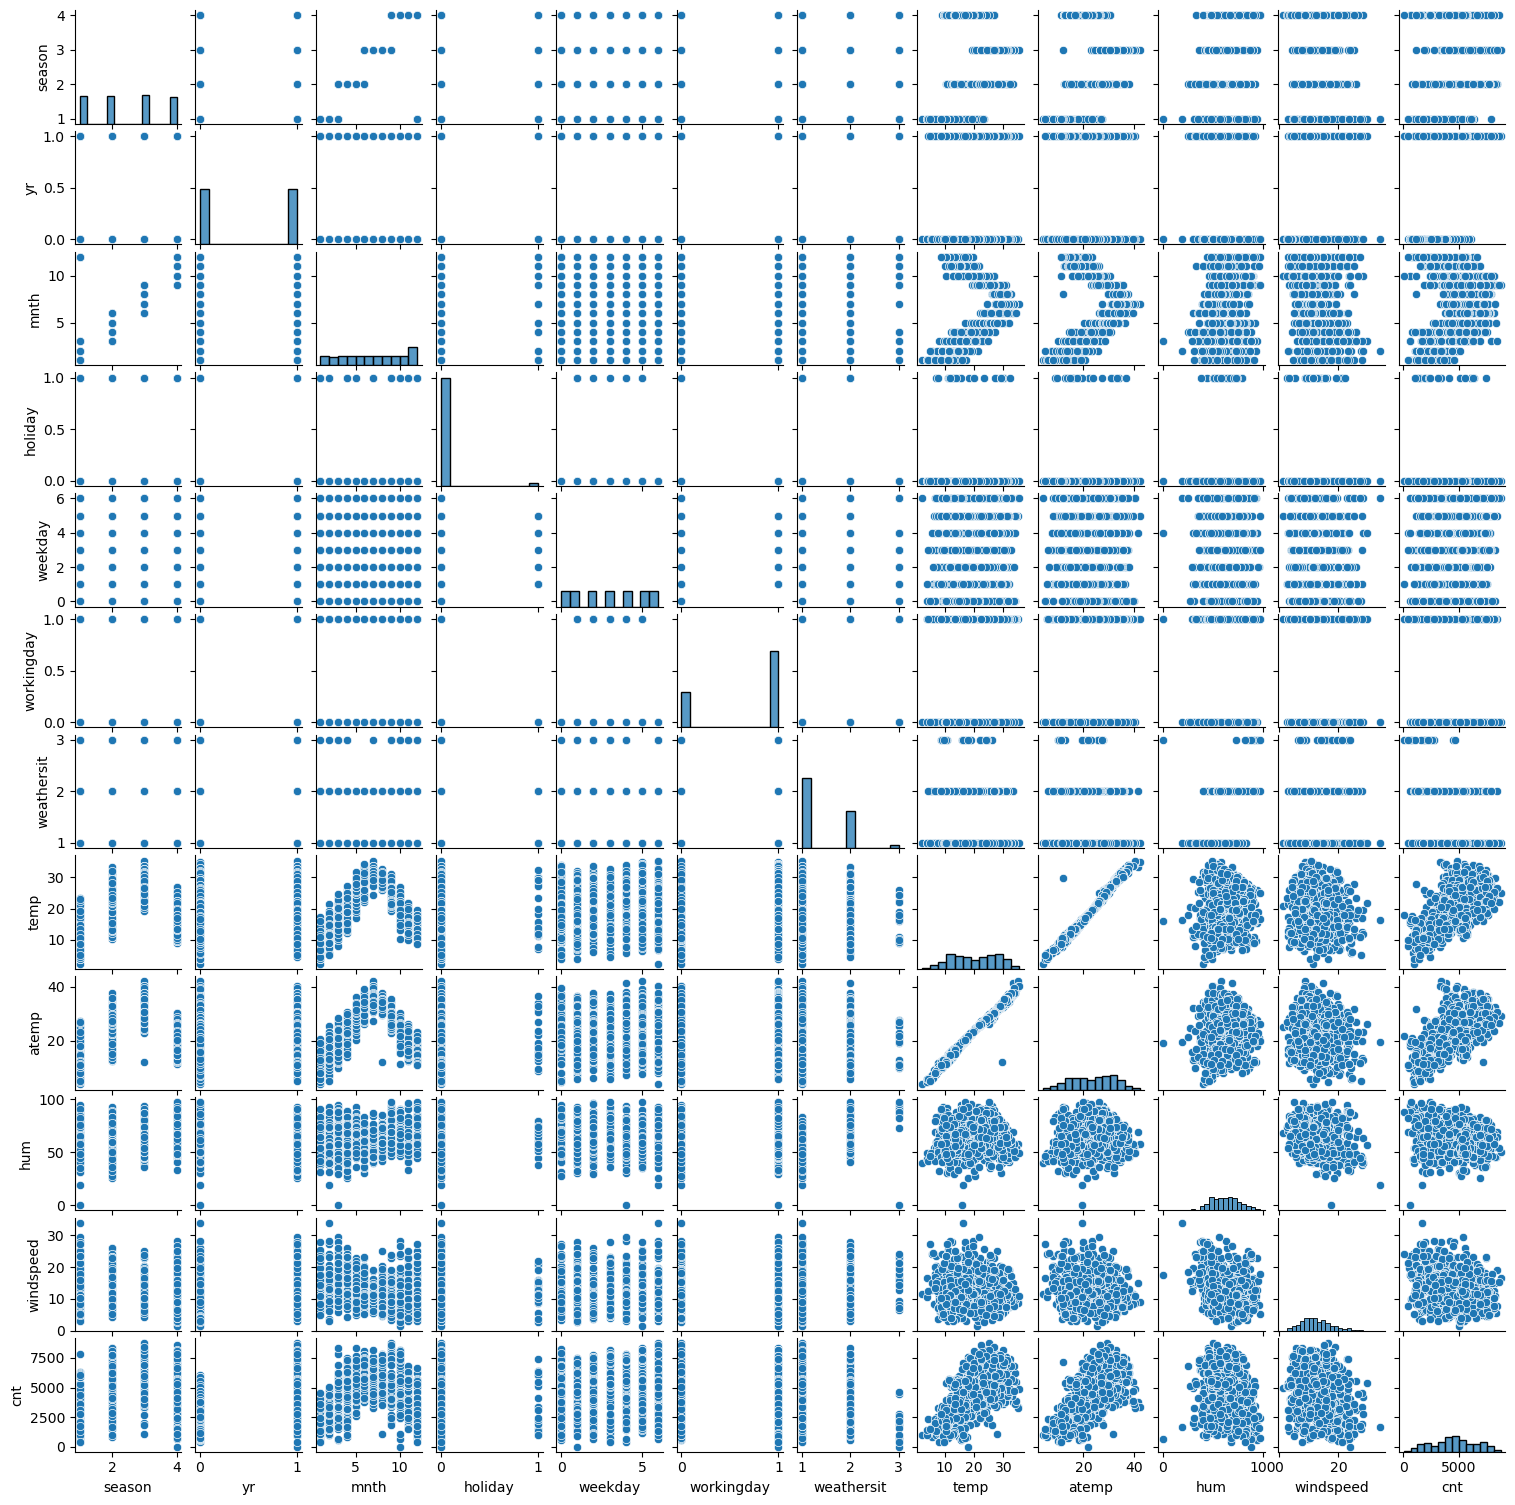

In [79]:
g = sn.pairplot(bikedemands)
g.fig.set_size_inches(15,15)
plt.show()

DATA  PREPARATION FOR MODELINL
ENCODING
    - Convert the numberic values in column Weathersit and Season to category String
    - Create dummy variables from the catogorial String
SPLITING INTO TRAIN AND TEST
RESCALING


In [131]:
# ENCODING
    #- Convert the numberic values in column Weathersit and Season to category String
    #- Create dummy variables from the catogorial String

season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bikedemands['season'] = bikedemands['season'].map(season_map)
bikedemands['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [132]:
weathae_map = {1:'ClearCloud', 2:'Mist', 3:'Snow'}
bikedemands['weathersit'] = bikedemands['weathersit'].map(weathae_map)
bikedemands['weathersit']

0            Mist
1            Mist
2      ClearCloud
3      ClearCloud
4      ClearCloud
          ...    
725          Mist
726          Mist
727          Mist
728    ClearCloud
729          Mist
Name: weathersit, Length: 730, dtype: object

In [133]:
weathae_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'April',5:'May', 6:'Jun', 7:'July', 8:'Aug',9:'Sep', 10:'Oct', 11:'Nov', 12:"Dec" }
bikedemands['mnth'] = bikedemands['mnth'].map(weathae_map)
bikedemands['mnth']

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: object

In [134]:
weathae_map = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed',4:'Thur', 5:'Fri', 6:'Sat' }
bikedemands['weekday'] = bikedemands['weekday'].map(weathae_map)
bikedemands['weekday']

0       Sat
1       Sun
2       Mon
3       Tue
4       Wed
       ... 
725    Thur
726     Fri
727     Sat
728     Sun
729     Mon
Name: weekday, Length: 730, dtype: object

In [135]:
bikedemands['weekday'] = bikedemands['weekday'].astype('category')
bikedemands['mnth'] = bikedemands['mnth'].astype('category')
bikedemands['season'] = bikedemands['season'].astype('category')
bikedemands['weathersit'] = bikedemands['weathersit'].astype('category')



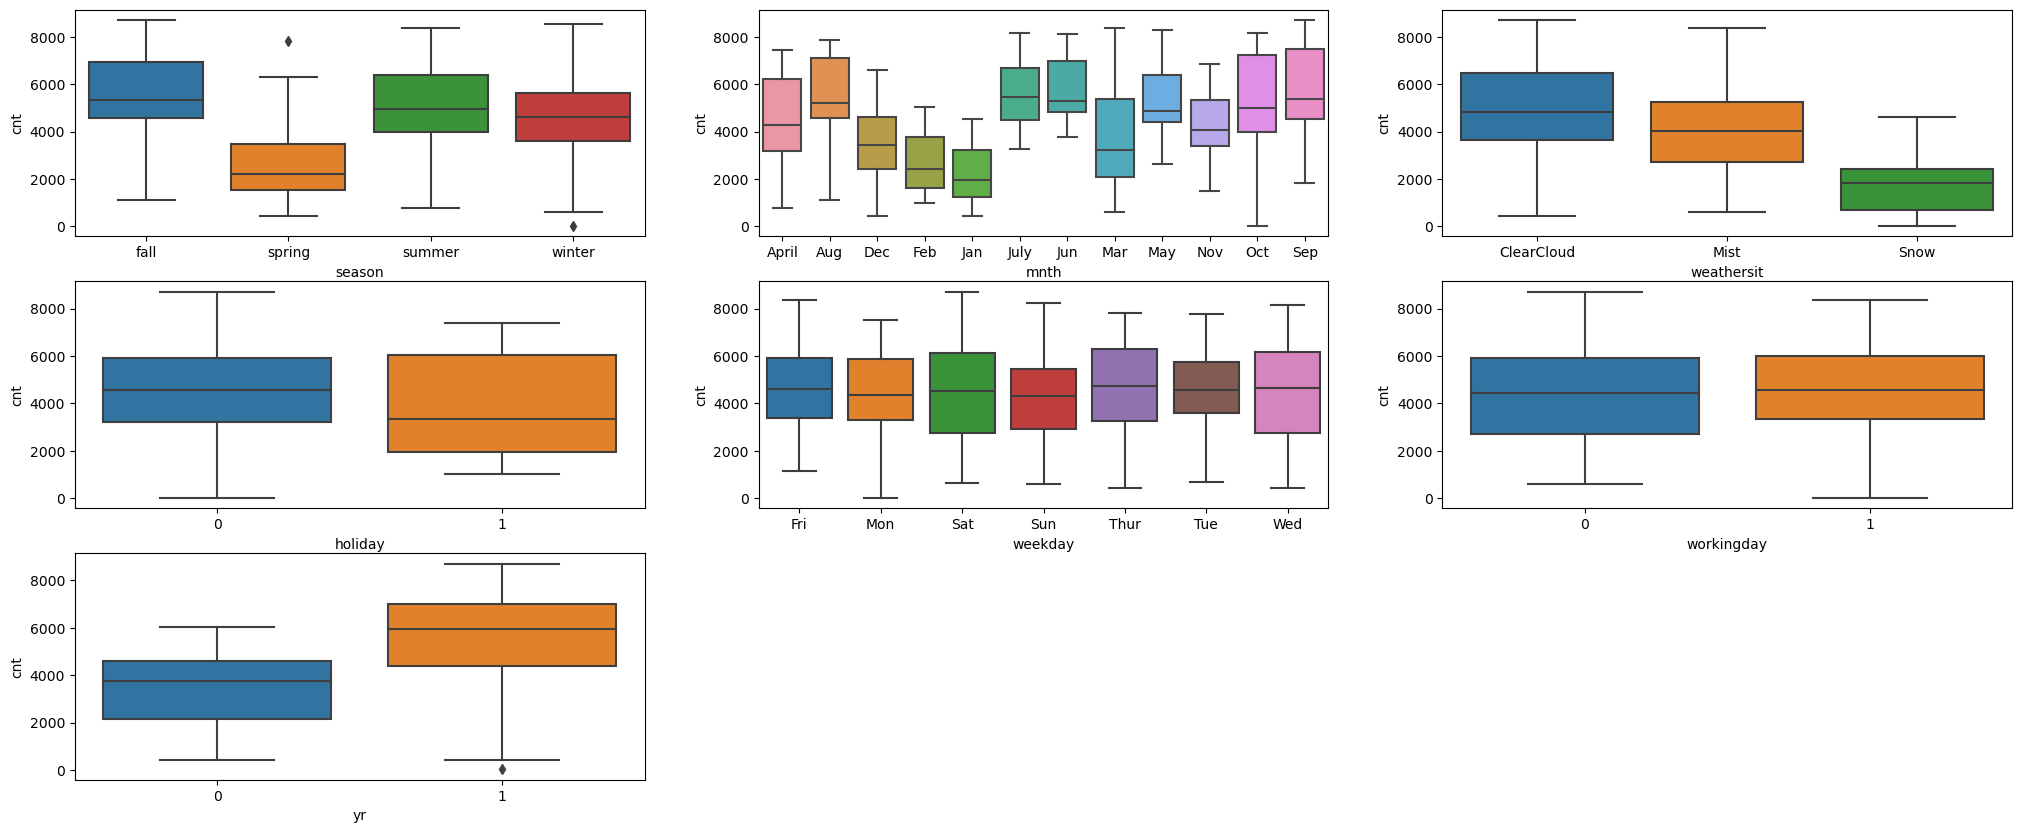

In [136]:
plt.figure(figsize=(25, 10))
plt.subplot(3,3,1)
sn.boxplot(x = 'season', y = 'cnt', data = bikedemands)
plt.subplot(3,3,2)
sn.boxplot(x = 'mnth', y = 'cnt', data = bikedemands)
plt.subplot(3,3,3)
sn.boxplot(x = 'weathersit', y = 'cnt', data = bikedemands)
plt.subplot(3,3,4)
sn.boxplot(x = 'holiday', y = 'cnt', data = bikedemands)
plt.subplot(3,3,5)
sn.boxplot(x = 'weekday', y = 'cnt', data = bikedemands)
plt.subplot(3,3,6)
sn.boxplot(x = 'workingday', y = 'cnt', data = bikedemands)
plt.subplot(3,3,7)
sn.boxplot(x = 'yr', y = 'cnt', data = bikedemands)
plt.show()

In [137]:
bikedemands.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


Create dummy variables for season & weather

In [138]:
bikedemands_new = pd.get_dummies(bikedemands, drop_first=True)
bikedemands_new

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,0,0,0,0,0,1,0,0,1,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,0,0,0,0,0,0,0,0,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0


In [139]:
bikedemands_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Mist', 'weathersit_Snow'],
      dtype='object')

In [140]:

#Splitting into train and test
df_train , df_test = train_test_split(bikedemands_new , train_size=0.7 , random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [141]:
#Rescaling - It is important that all the column numeric data except dummy needs to be in same range.count
    #- we have Normalization (MinsMax scalar)
    #- Standardisation
# Minmax Scalar
# MinsMax scalar (x-xmin)/(xmax - xmin)
# Standardisation = x - mu / sigma

scalar = MinMaxScaler()
var_Colum = ["temp","atemp","hum","windspeed","cnt"]
df_train[var_Colum] = scalar.fit_transform(df_train[var_Colum])
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,1,0


In [142]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


TRAINING THE MODEL

<Axes: >

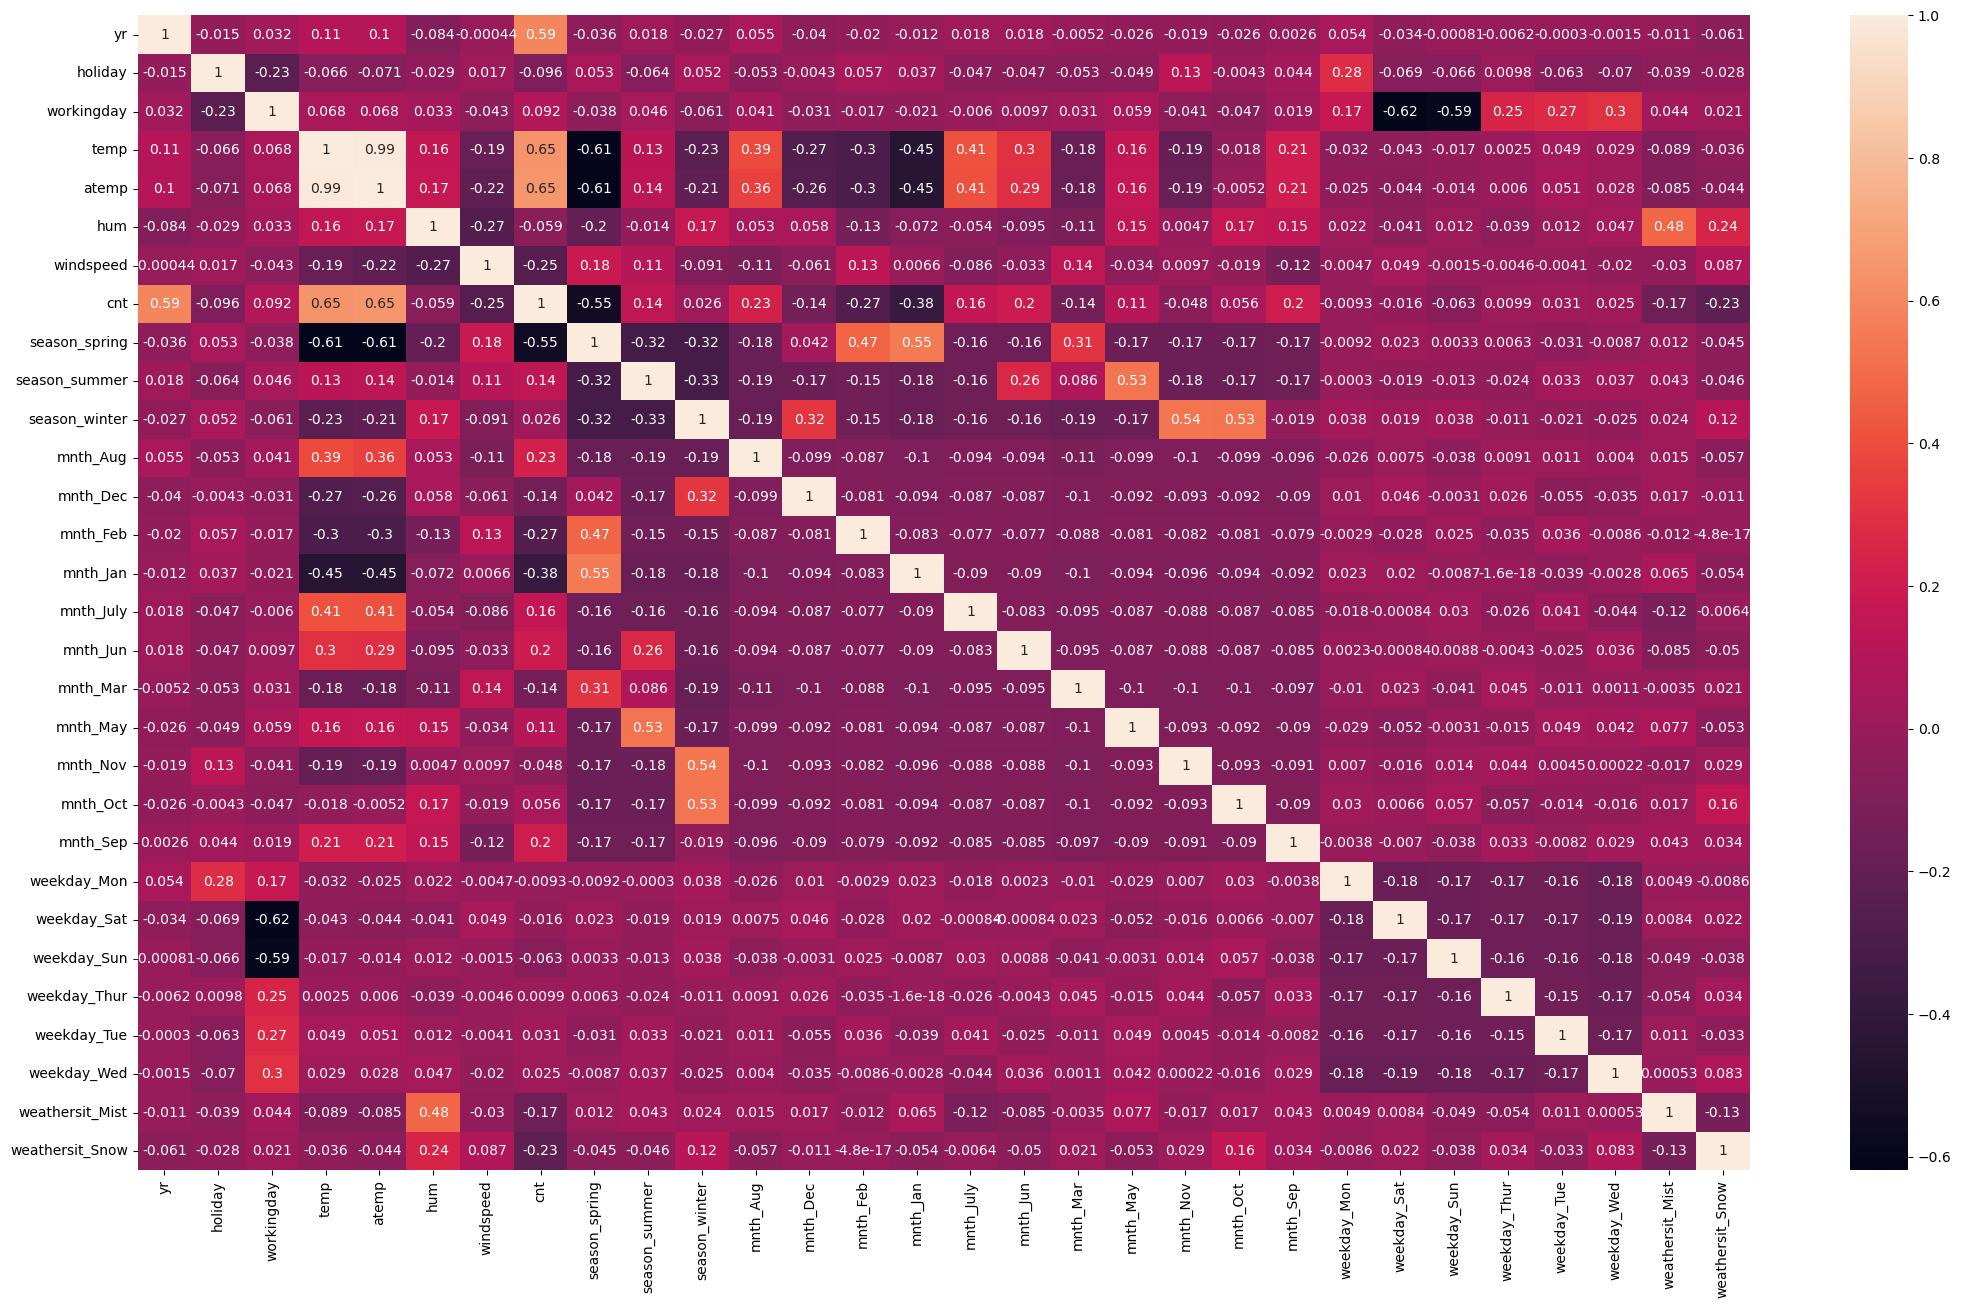

In [143]:
plt.figure(figsize=(26,15))
sn.heatmap(df_train.corr(), annot=True)

In [144]:
#Seperating Numerinc ANd Categorical Fields

bikedemands.columns


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [145]:
# X_train , y_train
y_train = df_train.pop("cnt")
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [146]:
#Use RFE to get the most imp features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm , n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)



In [147]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 13),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_July', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 8),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 15),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 11),
 ('weekday_Tue', False, 14),
 ('weekday_Wed', False, 12),
 ('weathersit_Mist', True, 1),
 ('weathersit_Snow', True, 1)]

In [148]:
filtered_column = X_train.columns[rfe.support_]
filtered_column

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
       'mnth_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_Mist',
       'weathersit_Snow'],
      dtype='object')

In [149]:
X_train.columns[~rfe.support_]


Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon',
       'weekday_Thur', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [150]:
X_train_rfe = X_train[filtered_column]
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
       'mnth_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_Mist',
       'weathersit_Snow'],
      dtype='object')

In [151]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [152]:
# add constants

X_train_sm = sm.add_constant(X_train_rfe)
# create 1st model
lr = sm.OLS(y_train, X_train_sm)
#fit()
lr_model = lr.fit()
lr_model.params

const              0.199526
yr                 0.229763
holiday           -0.018447
workingday         0.083669
temp               0.527708
hum               -0.161086
windspeed         -0.180875
season_spring     -0.055546
season_summer      0.053733
season_winter      0.099214
mnth_July         -0.054616
mnth_Sep           0.081983
weekday_Sat        0.093668
weekday_Sun        0.040636
weathersit_Mist   -0.056344
weathersit_Snow   -0.245009
dtype: float64

In [153]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          2.11e-191
Time:                        12:03:35   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1995      0.028      7.200      0.000       0.145       0.254
yr                  0.2298      0.008     28.647      0.000       0.214       0.246
holiday            -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday          0.0837      0.010      8.665      0.000       0.065       0.103
temp                0.5277      0.033     15.884      0.000       0.462       0.593
hum                -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed          -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring      -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer       0.0537      0.015      3.631      0.000       0.025       0.083
season_winter       0.0992      0.017      5.815      0.000       0.066       0.133
mnth_July          -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep            0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Sat         0.0937      0.012      8.040      0.000       0.071       0.117
weekday_Sun         0.0406      0.012      3.315      0.001       0.017       0.065
weathersit_Mist    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
weathersit_Snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.5e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We could have -
Keep Low P-val (0.05 > P-Value)
Keep Low VIF (5 > VIF)

First drop - High P-value & High VIF
Sec - Hign P-value
thirs- High VIF

In [154]:
#VIF

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values , i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by= "VIF", ascending=False)
vif

,Features,VIF
2,workingday,50.68
11,weekday_Sat,12.20
12,weekday_Sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
13,weathersit_Mist,1.57


In [155]:
#dropping holiday value due to hign  p value
X = X_train_rfe.drop(["holiday"] , axis=1)
X

,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_July,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Mist,weathersit_Snow
576,1,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1,0
111,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,1,0,1,0
79,0,1,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,1,0


In [156]:
X_train_sm2 = sm.add_constant(X)
# create 1st model
lr = sm.OLS(y_train, X_train_sm2)
#fit()
lr_model2 = lr.fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          2.11e-191
Time:                        12:03:43   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.042      4.301      0.000       0.098       0.264
yr                  0.2298      0.008     28.647      0.000       0.214       0.246
workingday          0.1021      0.025      4.024      0.000       0.052       0.152
temp                0.5277      0.033     15.884      0.000       0.462       0.593
hum                -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed          -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring      -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer       0.0537      0.015      3.631      0.000       0.025       0.083
season_winter       0.0992      0.017      5.815      0.000       0.066       0.133
mnth_July          -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_Sep            0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Sat         0.1121      0.027      4.181      0.000       0.059       0.165
weekday_Sun         0.0591      0.027      2.192      0.029       0.006       0.112
weathersit_Mist    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
weathersit_Snow    -0.2450      0.026     -9.395      0.000      -0.296      -0.194
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by= "VIF", ascending=False)
vif

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,weekday_Sat,4.91
5,season_spring,4.80
11,weekday_Sun,4.76
7,season_winter,3.69
6,season_summer,3.04
12,weathersit_Mist,2.31


In [158]:
X = X.drop(["hum","temp","workingday"] , axis=1)
X

,yr,windspeed,season_spring,season_summer,season_winter,mnth_July,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Mist,weathersit_Snow
576,1,0.264686,0,0,0,1,0,0,0,0,0
426,1,0.255342,1,0,0,0,0,1,0,1,0
728,1,0.663106,1,0,0,0,0,0,1,0,0
482,1,0.188475,0,1,0,0,0,1,0,1,0
111,0,0.380981,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1,0.187140,0,0,0,0,0,0,0,0,0
53,0,0.111379,1,0,0,0,0,0,0,0,0
350,0,0.431816,0,0,1,0,0,1,0,1,0
79,0,0.529881,0,1,0,0,0,0,0,1,0


In [159]:
X_train_sm3 = sm.add_constant(X)
# create 1st model
lr = sm.OLS(y_train, X_train_sm3)
#fit()
lr_model3 = lr.fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     146.2
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          4.39e-148
Time:                        12:03:51   Log-Likelihood:                 406.57
No. Observations:                 510   AIC:                            -789.1
Df Residuals:                     498   BIC:                            -738.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5866      0.017     34.459      0.000       0.553       0.620
yr                  0.2478      0.010     25.250      0.000       0.229       0.267
windspeed          -0.1736      0.030     -5.771      0.000      -0.233      -0.114
season_spring      -0.3023      0.017    -17.940      0.000      -0.335      -0.269
season_summer      -0.0437      0.017     -2.617      0.009      -0.076      -0.011
season_winter      -0.0800      0.016     -4.980      0.000      -0.112      -0.048
mnth_July          -0.0091      0.022     -0.411      0.681      -0.053       0.034
mnth_Sep            0.0681      0.020      3.344      0.001       0.028       0.108
weekday_Sat         0.0116      0.014      0.843      0.400      -0.015       0.039
weekday_Sun        -0.0431      0.014     -3.029      0.003      -0.071      -0.015
weathersit_Mist    -0.0895      0.010     -8.545      0.000      -0.110      -0.069
weathersit_Snow    -0.2964      0.030    -10.002      0.000      -0.355      -0.238
==============================================================================
Omnibus:                       38.165   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.111
Skew:                          -0.407   Prob(JB):                     2.00e-19
Kurtosis:                       4.841   Cond. No.                         9.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by= "VIF", ascending=False)
vif

,Features,VIF
1,windspeed,3.87
2,season_spring,2.09
3,season_summer,2.04
0,yr,1.84
4,season_winter,1.78
9,weathersit_Mist,1.51
5,mnth_July,1.21
7,weekday_Sat,1.21
8,weekday_Sun,1.20
6,mnth_Sep,1.16


RESIDUAL ANALYSIS

In [161]:
y_train_pred = lr_model3.predict(X_train_sm3)
y_train_pred

576    0.779355
426    0.409894
728    0.373911
482    0.680099
111    0.387293
         ...   
578    0.801928
53     0.265019
350    0.353737
79     0.361445
520    0.638797
Length: 510, dtype: float64

In [176]:
r2_score(y_train, y_train_pred)


0.7635053374997316

In [177]:
# n is number of rows in X
r2 = 0.7635053374997316
n = X_train.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_train.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7492171183070071

<Axes: ylabel='Density'>

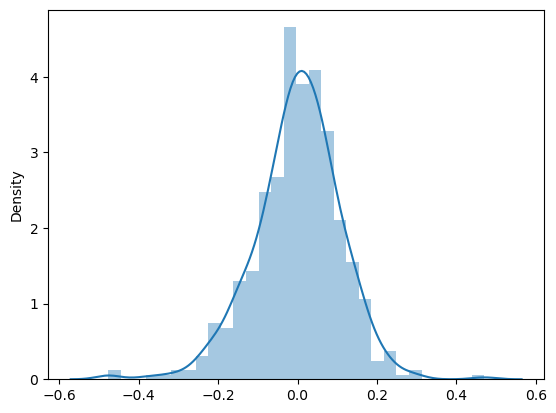

In [162]:
res = y_train - y_train_pred
sn.distplot(res)

Prediction & Evalution of Test set

In [163]:
var_Colum = ['temp','atemp','hum','windspeed','cnt']
df_test[var_Colum] = scalar.transform(df_test[var_Colum])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [167]:
X_train_sm3

,const,yr,windspeed,season_spring,season_summer,season_winter,mnth_July,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Mist,weathersit_Snow
576,1.0,1,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0.255342,1,0,0,0,0,1,0,1,0
728,1.0,1,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0.188475,0,1,0,0,0,1,0,1,0
111,1.0,0,0.380981,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0.111379,1,0,0,0,0,0,0,0,0
350,1.0,0,0.431816,0,0,1,0,0,1,0,1,0
79,1.0,0,0.529881,0,1,0,0,0,0,0,1,0


In [165]:
y_test = df_test.pop("cnt")
X_test = df_test
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,0,1,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0,1,0,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,1,...,1,0,0,0,0,0,0,1,1,0
72,0,0,1,0.331557,0.332005,0.512107,0.203418,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [168]:
X_test_lm3 = sm.add_constant(X_test)
X_test_lm3.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            220 non-null    float64
 1   yr               220 non-null    int64  
 2   holiday          220 non-null    int64  
 3   workingday       220 non-null    int64  
 4   temp             220 non-null    float64
 5   atemp            220 non-null    float64
 6   hum              220 non-null    float64
 7   windspeed        220 non-null    float64
 8   season_spring    220 non-null    uint8  
 9   season_summer    220 non-null    uint8  
 10  season_winter    220 non-null    uint8  
 11  mnth_Aug         220 non-null    uint8  
 12  mnth_Dec         220 non-null    uint8  
 13  mnth_Feb         220 non-null    uint8  
 14  mnth_Jan         220 non-null    uint8  
 15  mnth_July        220 non-null    uint8  
 16  mnth_Jun         220 non-null    uint8  
 17  mnth_Mar      

In [170]:
col1=X_train_sm3.columns
col1
X_test=X_test_lm3[col1]

In [171]:
X_test


,const,yr,windspeed,season_spring,season_summer,season_winter,mnth_July,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Mist,weathersit_Snow
184,1.0,0,0.084219,0,0,0,1,0,0,0,1,0
535,1.0,1,0.153728,0,1,0,0,0,0,0,0,0
299,1.0,0,0.334206,0,0,1,0,0,0,0,1,0
221,1.0,0,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,0.537414,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0.283397,0,0,1,0,0,0,0,0,0
127,1.0,0,0.069510,0,1,0,0,0,0,1,0,0
640,1.0,1,0.052115,0,0,1,0,0,0,0,1,0
72,1.0,0,0.203418,1,0,0,0,0,0,0,0,0


In [172]:
y_pred = lr_model3.predict(X_test)


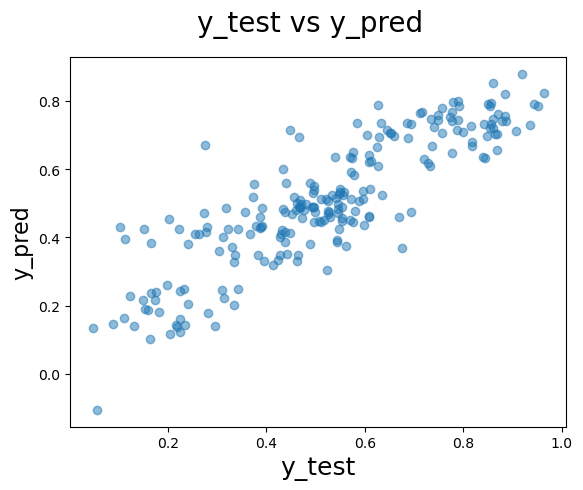

In [173]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [174]:
r2_score(y_test, y_pred)


0.7479212951462257

In [175]:
r2=0.7479212951462257

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.733308036893833

Final Result:
Train Set R2 = 0.7635053374997316
Train Ser Adjust R2 = 0.7492171183070071
Test Set R2 = 0.7479212951462257
Test Ser Adjust R2 = 0.733308036893833

The perfect fit line is 

cnt = 0.2385(yr) + 0.0076(weekday) + 0.6161(atemp) - 0.0552(Mist)